In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### <center> Задание по линейной регрессии
Данный набор данных - более чистая версия данных из лабораторной работы по очистке данных. Теперь будем строить модель линейной регрессии для прогнозирования стоимости жилья.
    
1. Построить корреляционную матрицу, чтобы найти, какой признак больше всего коррелирует с ценой.
2. Постройте однофакторную модель регрессии по этому признаку. Сделайте анализ остатков модели, посмотрите на качество метрик (R-квадрат и MAE), сделайте выводы о качестве модели (написать комментарий).
3. Постройте многофакторную модель регрессии по всем признакам. Сделайте анализ остатков модели, посмотрите на качество метрик, сделайте выводы о качестве модели.
4. Поочередно выкидывайте признаки из модели, чтобы оценить, какие из них являются важными, а какие - нет. Сделайте выводы о важности признаков.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/regression_data.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907,1.0,12.0,75377,Hamovniki,2750000,55485.2,14983.92,47.35,40.77,2.31,76.37
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980,2.0,8.0,68630,Lianozovo,9000000,55485.2,14983.92,47.35,40.77,2.31,76.37
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014,3.0,12.0,9553,Poselenie Voskresenskoe,7011550,55485.2,14983.92,47.35,40.77,2.31,76.37
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970,2.0,6.0,78616,Severnoe Butovo,7100000,55485.2,14983.92,47.35,40.77,2.31,76.37
4,8258,2013-05-30,74,46.0,12.0,3.0,24.0,1.0,2004,3.0,9.0,27992,Juzhnoe Medvedkovo,12100000,55485.2,14983.92,47.35,40.77,2.31,76.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,30467,2015-06-30,56,51.0,19.0,1.0,19.0,1.0,2017,2.0,1.0,37502,Sviblovo,10262010,64310.0,18720.65,49.01,38.91,30.29,76.77
14812,30469,2015-06-30,44,27.0,7.0,3.0,9.0,1.0,1975,2.0,6.0,61396,Otradnoe,7400000,64310.0,18720.65,49.01,38.91,30.29,76.77
14813,30470,2015-06-30,86,59.0,3.0,3.0,9.0,2.0,1935,4.0,10.0,116742,Tverskoe,25000000,64310.0,18720.65,49.01,38.91,30.29,76.77
14814,30472,2015-06-30,64,32.0,5.0,2.0,15.0,1.0,2003,2.0,11.0,83844,Obruchevskoe,13500000,64310.0,18720.65,49.01,38.91,30.29,76.77


In [ ]:
df.corr()

,id,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
id,1.000000,0.047572,0.007082,0.020489,-0.105563,0.035155,0.021266,-0.013847,0.017088,-0.002109,-0.011505,0.072959,0.820880,0.896189,0.609556,-0.050312,-0.193437,0.756910
full_sq,0.047572,1.000000,0.249767,0.160430,-0.067906,0.210499,0.049657,-0.006277,0.708513,0.039477,-0.022089,0.634608,0.052252,0.060446,0.016030,-0.035652,-0.040892,0.041105
life_sq,0.007082,0.249767,1.000000,0.034202,-0.068710,0.044023,0.010075,-0.002417,0.181143,0.002197,-0.019616,0.137888,-0.001363,0.009860,0.001000,-0.004863,-0.006890,-0.005509
floor,0.020489,0.160430,0.034202,1.000000,-0.069236,0.537254,0.031061,0.001479,0.002473,0.007214,-0.020477,0.137385,0.023191,0.024981,0.002392,-0.021423,-0.021676,0.019126
state,-0.105563,-0.067906,-0.068710,-0.069236,1.000000,-0.026325,-0.084279,0.304078,0.065234,0.024303,0.072079,0.106716,-0.097458,-0.108998,-0.049222,0.047281,0.054033,-0.086235
max_floor,0.035155,0.210499,0.044023,0.537254,-0.026325,1.000000,0.077608,-0.000291,-0.004804,0.038296,0.000004,0.161406,0.032826,0.042137,0.008058,-0.029636,-0.032839,0.026313
material,0.021266,0.049657,0.010075,0.031061,-0.084279,0.077608,1.000000,-0.004831,-0.041341,0.034055,0.019234,0.060954,0.006922,0.026442,0.009165,-0.013824,-0.016946,-0.000067
build_year,-0.013847,-0.006277,-0.002417,0.001479,0.304078,-0.000291,-0.004831,1.000000,-0.008819,0.000478,-0.000876,0.002159,-0.016022,-0.009669,-0.009700,0.003141,-0.002827,-0.017266
num_room,0.017088,0.708513,0.181143,0.002473,0.065234,-0.004804,-0.041341,-0.008819,1.000000,0.015373,-0.004929,0.472094,0.019586,0.028146,0.003765,-0.016515,-0.021919,0.011347
kitch_sq,-0.002109,0.039477,0.002197,0.007214,0.024303,0.038296,0.034055,0.000478,0.015373,1.000000,-0.000167,0.026619,-0.004369,0.003220,0.001304,-0.002743,-0.001924,-0.007706


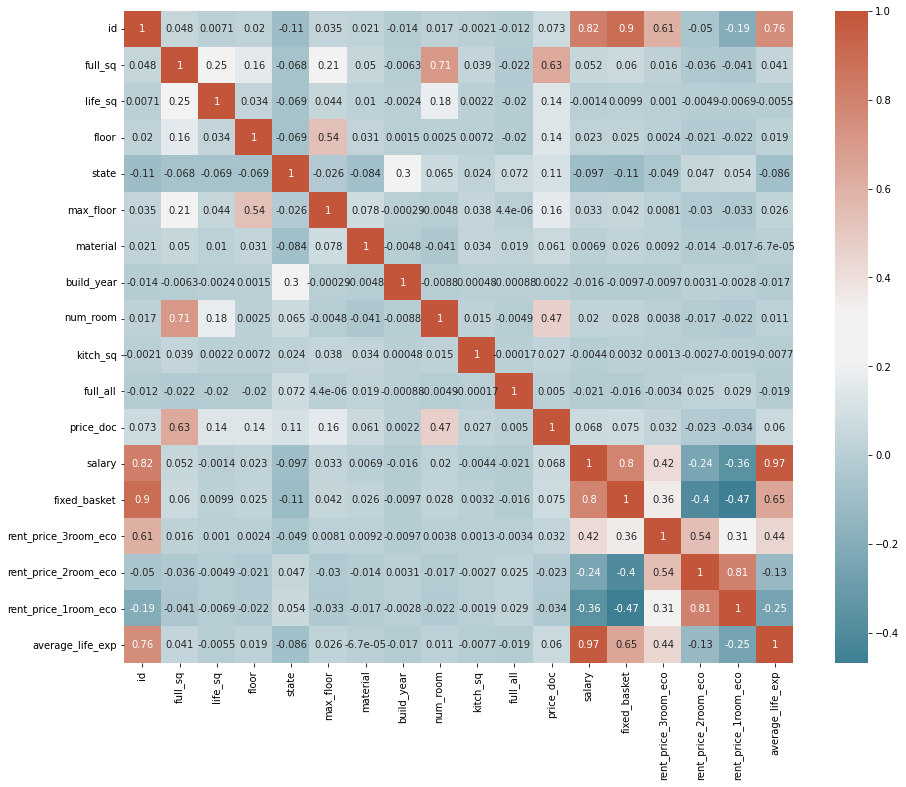

In [ ]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(),cmap=cmap,  annot=True);

In [ ]:
# Формируем X и y для построения модели
x = df[['full_sq']]
y = df['price_doc']


# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(x, y)

# Делаем предказание, применяя метод predict() и сохраняем его в отдельную переменную
pred_1 = reg_model.predict(x)

# __Смотрим метрики качества__
print('R2: ', r2_score(y, pred_1)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_1))

R2:  0.40272744877628297
Mean absolute error (MAE) 2427536.071947832


In [ ]:
# коэффициенты модели
reg_model.coef_


array([149106.90749413])

In [ ]:
# свободный член (сдвиг)
reg_model.intercept_

-184232.1583610978

In [ ]:
y = df['price_doc']
x = df['full_sq']
# необходимо добавить константу 1 для корректной работы модели
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
pred_1 = results.predict(x)
print(results.summary())
# print('R2: ', results.rsquared)
# print('Parameters: ', results.params)
# print('\nMean absolute error (MAE)', sm.tools.eval_measures.meanabs(y, pred_1))

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     9989.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:59:01   Log-Likelihood:            -2.4589e+05
No. Observations:               14816   AIC:                         4.918e+05
Df Residuals:                   14814   BIC:                         4.918e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.842e+05   8.57e+04     -2.149      0.0

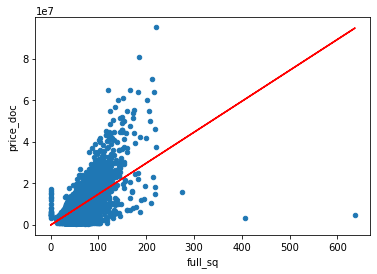

In [ ]:
df.plot(x='full_sq', y='price_doc', kind='scatter')
plt.plot(df['full_sq'], pred_1, color='red');

In [ ]:
residuals = pd.DataFrame({'Price':df['price_doc'],
                          'Predictions':pred_1})
residuals['Errors'] = residuals['Price']-residuals['Predictions']
residuals.head()

,Price,Predictions,Errors
0,2750000,1.455944e+06,1.294056e+06
1,9000000,7.718434e+06,1.281566e+06
2,7011550,1.129700e+07,-4.285450e+06
3,7100000,6.525579e+06,5.744213e+05
4,12100000,1.084968e+07,1.250321e+06


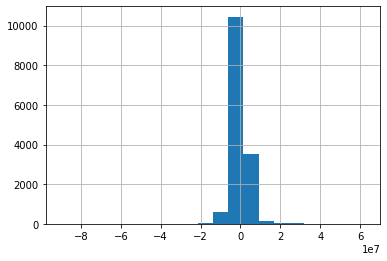

In [ ]:
residuals['Errors'].hist(bins=20)

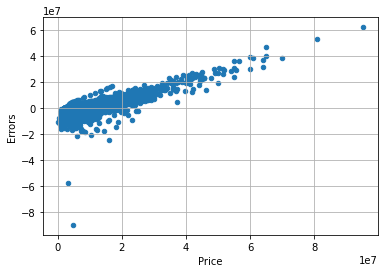

In [ ]:
residuals.plot(x='Price',y='Errors',kind='scatter',grid=True)

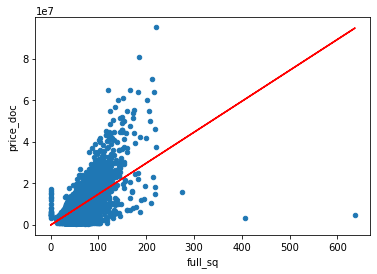

In [ ]:
df.plot(x='full_sq',y='price_doc',kind='scatter')
plt.plot(df['full_sq'], pred_1,color='red');

In [ ]:
df[(df['full_sq']>250)&(df['price_doc']>7.9)]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
6190,18528,2014-05-16,275,232.0,11.0,1.0,37.0,6.0,2009,5.0,26.0,166803,Shhukino,15919294,61208.0,16205.25,50.24,41.17,32.87,76.70
9301,22788,2014-09-23,637,637.0,18.0,1.0,19.0,4.0,2016,2.0,10.0,116742,Tverskoe,4725142,61208.0,16165.30,51.41,43.26,34.52,76.70
12933,27796,2015-02-09,407,407.0,4.0,1.0,4.0,4.0,2015,1.0,10.0,112804,Filevskij Park,3134129,64310.0,18295.07,51.49,41.86,34.35,76.77


In [ ]:
# Находим индексы выбросов и удаляем их
ind = df[(df['full_sq']>250)&(df['price_doc']>7.9)].index
clean_data = df.drop(ind, axis='index')

In [ ]:
# Формируем X и y для построения модели на данных без выбросов
x = clean_data[['full_sq']]
y = clean_data['price_doc']

# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(x, y)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_2 = reg_model.predict(x)

# __Смотрим метрики качества__
print('R2: ', r2_score(y, pred_2)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_2))

R2:  0.4369818988722176
Mean absolute error (MAE) 2449565.614991748


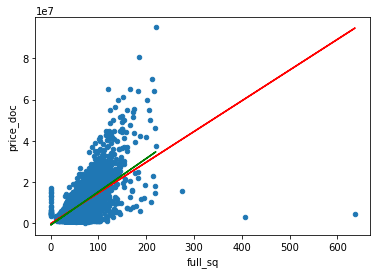

In [ ]:
df.plot(x='full_sq',y='price_doc',kind='scatter')
plt.plot(df['full_sq'], pred_1, color='red')
plt.plot(clean_data['full_sq'], pred_2,color='green')

In [ ]:
residuals2 = pd.DataFrame({'Price':clean_data['price_doc'],
                          'Predictions':pred_2})
residuals2['Errors'] = residuals2['Price']-residuals2['Predictions']

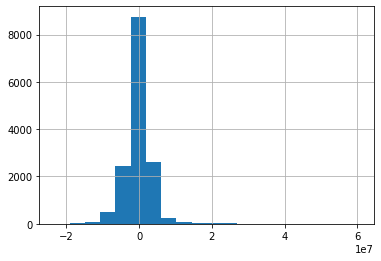

In [ ]:
residuals2['Errors'].hist(bins=20)

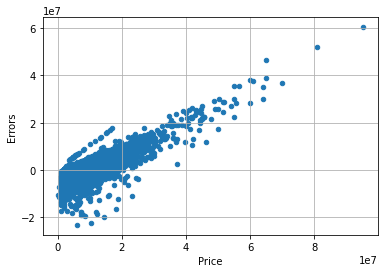

In [ ]:
residuals2.plot(x='Price',y='Errors',kind='scatter',grid=True)

In [ ]:
# Формируем X и y для построения модели
x = df[['full_sq','life_sq','floor','state','max_floor','material','build_year','num_room','kitch_sq','full_all','salary','fixed_basket','rent_price_3room_eco','rent_price_2room_eco','average_life_exp']]
y = df['price_doc']

# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(x, y)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_3 = reg_model.predict(x)

# __Смотрим метрики качества__
print('R2: ', r2_score(y, pred_3)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_3))

R2:  0.43490852526472834
Mean absolute error (MAE) 2305052.112800962


In [ ]:
# коэффициенты модели
reg_model.coef_

array([ 1.45037428e+05, -9.16003973e+02,  4.43421048e+04,  1.04709500e+06,
        6.25333073e+03,  1.41832931e+05, -1.39011551e+00,  1.51530329e+05,
       -7.19919253e+02,  1.07236344e-01, -3.45970079e+02,  5.03365417e+02,
       -3.05064357e+04,  6.72381401e+04,  6.19711206e+06])

In [ ]:
# свободный член (сдвиг)
reg_model.intercept_

-466843678.4422185

In [ ]:
coef_df = pd.DataFrame(reg_model.coef_.reshape(1,-1),  columns=x.columns)
coef_df

,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,average_life_exp
0,145037.427648,-916.003973,44342.104764,1.047095e+06,6253.330727,141832.930838,-1.390116,151530.328743,-719.919253,0.107236,-345.970079,503.365417,-30506.435672,67238.140095,6.197112e+06


In [ ]:
# Формируем X и y для построения модели
x = clean_data[['full_sq','life_sq','floor','state','max_floor','material','build_year','num_room','kitch_sq','full_all','salary','fixed_basket','rent_price_3room_eco','rent_price_2room_eco','average_life_exp']]
y = clean_data['price_doc']

# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(x, y)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_4 = reg_model.predict(x)

# __Смотрим метрики качества__
print('R2: ', r2_score(y, pred_4)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_4))

R2:  0.46985742994521595
Mean absolute error (MAE) 2326406.238302403


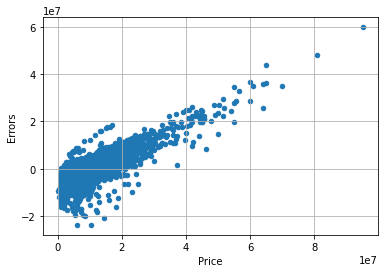

In [ ]:
residuals = pd.DataFrame({'Price':clean_data['price_doc'],'Predictions':pred_4})
residuals['Errors'] = residuals['Price']-residuals['Predictions']
residuals.plot(x='Price',y='Errors',kind='scatter',grid=True);

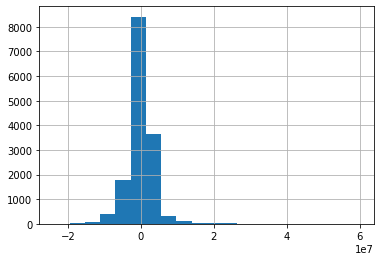

In [ ]:
residuals['Errors'].hist(bins=20)

In [ ]:
for col in x.columns[:]:
    tmp = x.drop([col],axis='columns')
    print('Убрали признак: ', col)
    y_tmp = df['price_doc']
    x_tmp = sm.add_constant(tmp)
    model_tmp = LinearRegression() 
    model_tmp.fit(x_tmp, y_tmp)
    preds =  model_tmp.predict(x_tmp)
    print('R2: ', r2_score(y_tmp, preds)) # reg_model.score
    print('Mean absolute error (MAE)', mean_absolute_error(y_tmp, preds))
    print('_'*50)

Убрали признак:  full_sq
R2:  0.07425494785034048
Mean absolute error (MAE) 2975872.310489023
__________________________________________________
Убрали признак:  life_sq
R2:  0.43447565746602224
Mean absolute error (MAE) 2303465.2817955003
__________________________________________________
Убрали признак:  floor
R2:  0.4332642533674357
Mean absolute error (MAE) 2304890.894335542
__________________________________________________
Убрали признак:  state
R2:  0.4076385684707696
Mean absolute error (MAE) 2429004.640716525
__________________________________________________
Убрали признак:  max_floor
R2:  0.4345866135017955
Mean absolute error (MAE) 2303403.733731409
__________________________________________________
Убрали признак:  material
R2:  0.43292179308752377
Mean absolute error (MAE) 2302914.894518474
__________________________________________________
Убрали признак:  build_year
R2:  0.43264902058835397
Mean absolute error (MAE) 2307056.0137119284
___________________________________

In [ ]:
x =df[['full_sq','life_sq','floor','state','max_floor','material','build_year','kitch_sq','full_all','salary','fixed_basket','rent_price_3room_eco','rent_price_2room_eco','average_life_exp']]
y=df[['price_doc']]

model = LinearRegression()
model.fit(x, y)
pred_1= model.predict(x)


print('R2: ', r2_score(y, pred_1)) 
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_1))

R2:  0.4345976029059344
Mean absolute error (MAE) 2303316.9201094946


In [ ]:
#обучим модель
x =df[['full_sq','life_sq','floor','state','max_floor','material','build_year','kitch_sq','full_all','salary','fixed_basket','rent_price_3room_eco','rent_price_2room_eco','average_life_exp']]
y=df[['price_doc']]

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.3,random_state=17)

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5,step=1) 
selector = rfe.fit(x_train,y_train)# model.fit(x_train, y_train)
pred_1= selector.predict(x_valid)#pred_1= model.predict(x_valid)
pred_2=selector.predict(x_train)#pred_1= model.predict(x_valid)

print('Тестовая выборка:')
print('R2: ', r2_score(y_valid, pred_1)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_valid, pred_1))
print('_'*50)
print('Обучающая выборка:')
print('R2: ', r2_score(y_train, pred_2)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_train, pred_2))

Тестовая выборка:
R2:  0.459448021068652
Mean absolute error (MAE) 2317865.4098922475
__________________________________________________
Обучающая выборка:
R2:  0.4171757236127228
Mean absolute error (MAE) 2292372.3638383104
